In [3]:
import os, duckdb

base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\ratings_raw"
out_path = os.path.join(base, "noteRatings_master.parquet")

con = duckdb.connect()
con.execute("PRAGMA memory_limit='2GB';")
con.execute(f"PRAGMA temp_directory='{base}';")

print("🚀 Combining all noteRatings parquet files...")
con.execute(f"""
COPY (
  SELECT * FROM read_parquet('{base}\\noteRatings-*.parquet')
) TO '{out_path}' (FORMAT PARQUET);
""")

con.close()
print(f"✅ Master parquet ready → {out_path}")


🔍 Found 20 parquet files

🚀 Processing batch 1 / 11
   Files: ['C:\\Users\\wongb\\twitter-community-notes-time-series\\twitter-community-notes-user-time-series\\user_data_aggregating\\data\\ratings_raw\\noteRatings-00000.parquet', 'C:\\Users\\wongb\\twitter-community-notes-time-series\\twitter-community-notes-user-time-series\\user_data_aggregating\\data\\ratings_raw\\noteRatings-00001.parquet']


ModuleNotFoundError: No module named 'pyarrow'

In [5]:
# Path to the master parquet file
base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data"
master_path = os.path.join(base, "scored_notes_2dim.parquet")

print(f"📊 Loading and analyzing: {master_path}\n")

con = duckdb.connect()

# Get row count
row_count = con.execute(f"SELECT COUNT(*) FROM '{master_path}'").fetchone()[0]
print(f"Total rows: {row_count:,}\n")

# Get column names and types
print("Column names and types:")
schema = con.execute(f"DESCRIBE SELECT * FROM '{master_path}'").fetchdf()
print(schema.to_string(index=False))
print(f"\nTotal columns: {len(schema)}\n")

# Get basic statistics
print("Preview of first 5 rows:")
preview = con.execute(f"SELECT * FROM '{master_path}' LIMIT 5").fetchdf()
print(preview)

con.close()

📊 Loading and analyzing: C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\scored_notes_2dim.parquet

Total rows: 2,339,700

Column names and types:
                      column_name column_type null  key default extra
                           noteId      BIGINT  YES None    None  None
                coreNoteIntercept       FLOAT  YES None    None  None
                  coreNoteFactor1       FLOAT  YES None    None  None
                finalRatingStatus     VARCHAR  YES None    None  None
                         firstTag     VARCHAR  YES None    None  None
                        secondTag     VARCHAR  YES None    None  None
                  coreActiveRules     VARCHAR  YES None    None  None
                 activeFilterTags     VARCHAR  YES None    None  None
                   classification     VARCHAR  YES None    None  None
                  createdAtMillis      DOUBLE  YES None    None  None
            

In [37]:
# Path to the master parquet file
base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\ratings_raw"
master_path = os.path.join(base, "noteRatings_master.parquet")

print(f"📊 Loading and analyzing: {master_path}\n")

con = duckdb.connect()

# Get row count
row_count = con.execute(f"SELECT COUNT(*) FROM '{master_path}'").fetchone()[0]
print(f"Total rows: {row_count:,}\n")

# Get column names and types
print("Column names and types:")
schema = con.execute(f"DESCRIBE SELECT * FROM '{master_path}'").fetchdf()
print(schema.to_string(index=False))
print(f"\nTotal columns: {len(schema)}\n")

# Get basic statistics
print("Preview of first 5 rows:")
preview = con.execute(f"SELECT * FROM '{master_path}' LIMIT 5").fetchdf()
print(preview)

# Get unique count for each column
print("\n📊 Unique counts per column:")
column_names = schema['column_name'].tolist()
unique_counts = []
for col in column_names:
    unique_count = con.execute(f"SELECT COUNT(DISTINCT {col}) FROM '{master_path}'").fetchone()[0]
    unique_counts.append({'column': col, 'unique_count': unique_count})

import pandas as pd
unique_df = pd.DataFrame(unique_counts)
print(unique_df.to_string(index=False))

# Get distinct values for helpful column
print("\n📋 Distinct values in 'helpful' column:")
helpful_values = con.execute(f"SELECT DISTINCT helpful FROM '{master_path}' ORDER BY helpful").fetchdf()
print(helpful_values)

# Get distinct values for notHelpful column
print("\n📋 Distinct values in 'notHelpful' column:")
notHelpful_values = con.execute(f"SELECT DISTINCT notHelpful FROM '{master_path}' ORDER BY notHelpful").fetchdf()
print(notHelpful_values)

# Get distribution of notHelpful values
print("\n📊 Distribution of 'notHelpful' values:")
notHelpful_dist = con.execute(f"""
    SELECT 
        helpfulnessLevel, 
        COUNT(*) as count,
        ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as percentage
    FROM '{master_path}'
    GROUP BY helpfulnessLevel
    ORDER BY helpfulnessLevel
""").fetchdf()
print(notHelpful_dist.to_string(index=False))

con.close()

📊 Loading and analyzing: C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\ratings_raw\noteRatings_master.parquet

Total rows: 171,877,798

Column names and types:
                         column_name column_type null  key default extra
                              noteId      BIGINT  YES None    None  None
                  raterParticipantId     VARCHAR  YES None    None  None
                     createdAtMillis      BIGINT  YES None    None  None
                             version      BIGINT  YES None    None  None
                               agree      BIGINT  YES None    None  None
                            disagree      BIGINT  YES None    None  None
                             helpful      BIGINT  YES None    None  None
                          notHelpful      BIGINT  YES None    None  None
                    helpfulnessLevel     VARCHAR  YES None    None  None
                        helpfulOther 

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

                              column  unique_count
                              noteId       2150536
                  raterParticipantId       1281444
                     createdAtMillis     171636606
                             version             2
                               agree             2
                            disagree             2
                             helpful             2
                          notHelpful             2
                    helpfulnessLevel             3
                        helpfulOther             2
                  helpfulInformative             2
                        helpfulClear             2
                   helpfulEmpathetic             2
                  helpfulGoodSources             2
                helpfulUniqueContext             2
               helpfulAddressesClaim             2
             helpfulImportantContext             2
             helpfulUnbiasedLanguage             2
                     notHelpful

In [35]:
import os, gc, duckdb

# --- Paths ---
base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data"
ratings_dir = os.path.join(base, "ratings_raw")
scores_path  = os.path.join(base, "scored_notes_2dim.parquet")

output_dir = os.path.join(base, "intermediates")
os.makedirs(output_dir, exist_ok=True)
TEMP_DIR = os.path.join(output_dir, "tmp_join")
os.makedirs(TEMP_DIR, exist_ok=True)

out_path = os.path.join(output_dir, "ratings_with_scores.parquet")

# --- Settings ---
MEM_LIMIT_GB = 4
BATCH_SIZE   = 5_000_000  # tune to fit your RAM

# --- Connect and count total rows across all parquet partitions ---
con = duckdb.connect()
con.execute(f"PRAGMA memory_limit='{MEM_LIMIT_GB}GB';")
con.execute(f"PRAGMA temp_directory='{TEMP_DIR}';")

total_rows = con.execute(
    f"SELECT SUM(row_count) FROM (SELECT COUNT(*) AS row_count FROM read_parquet('{ratings_dir}\\noteRatings-*.parquet'))"
).fetchone()[0]

print(f"Total rating rows: {total_rows:,}")
con.close()

# --- Process in batches ---
offset = 0
batch_idx = 0
part_files = []

while offset < total_rows:
    batch_idx += 1
    out_part = os.path.join(TEMP_DIR, f"ratings_scores_part_{batch_idx:03d}.parquet")
    print(f"\n🚀 Joining batch {batch_idx} (offset {offset:,})")

    con = duckdb.connect()
    con.execute(f"PRAGMA memory_limit='{MEM_LIMIT_GB}GB';")
    con.execute(f"PRAGMA temp_directory='{TEMP_DIR}';")

    # build query
    query = f"""
    COPY (
        WITH r AS (
            SELECT
                noteId,
                raterParticipantId,
                createdAtMillis,
                helpfulnessLevel
            FROM read_parquet('{ratings_dir}\\noteRatings-*.parquet')
            LIMIT {BATCH_SIZE} OFFSET {offset}
        ),
        r2 AS (
            SELECT
                *,
                CASE
                    WHEN helpfulnessLevel IN ('HELPFUL', 'SOMEWHAT_HELPFUL') THEN 'HELPFUL'
                    WHEN helpfulnessLevel = 'NOT_HELPFUL' THEN 'NOT_HELPFUL'
                    ELSE 'UNKNOWN'
                END AS ratingStatus
            FROM r
        )
        SELECT
            r2.raterParticipantId,
            r2.noteId,
            r2.ratingStatus,
            r2.createdAtMillis,
            s.coreNoteIntercept,
            s.coreNoteFactor1
        FROM r2
        LEFT JOIN read_parquet('{scores_path}') s USING (noteId)
    ) TO '{out_part}' (FORMAT PARQUET);
    """

    con.execute(query)
    con.close()
    part_files.append(out_part)
    offset += BATCH_SIZE
    gc.collect()

# --- Merge all parts into one big file ---
print("\n🧩 Combining all parts into one parquet...")
con = duckdb.connect()
con.execute(f"PRAGMA memory_limit='{MEM_LIMIT_GB}GB';")
con.execute(f"PRAGMA temp_directory='{TEMP_DIR}';")

con.execute(f"""
COPY (
  SELECT * FROM read_parquet({part_files})
) TO '{out_path}' (FORMAT PARQUET);
""")

con.close()
print(f"✅ Done. ratings_with_scores.parquet written to {out_path}")



Total rating rows: 171,877,798

🚀 Joining batch 1 (offset 0)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 2 (offset 5,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 3 (offset 10,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 4 (offset 15,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 5 (offset 20,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 6 (offset 25,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 7 (offset 30,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 8 (offset 35,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 9 (offset 40,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 10 (offset 45,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 11 (offset 50,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 12 (offset 55,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 13 (offset 60,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 14 (offset 65,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 15 (offset 70,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 16 (offset 75,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 17 (offset 80,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 18 (offset 85,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 19 (offset 90,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 20 (offset 95,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 21 (offset 100,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 22 (offset 105,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 23 (offset 110,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 24 (offset 115,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 25 (offset 120,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 26 (offset 125,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 27 (offset 130,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 28 (offset 135,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 29 (offset 140,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 30 (offset 145,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 31 (offset 150,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 32 (offset 155,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 33 (offset 160,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 34 (offset 165,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🚀 Joining batch 35 (offset 170,000,000)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


🧩 Combining all parts into one parquet...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

✅ Done. ratings_with_scores.parquet written to C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates\ratings_with_scores.parquet


In [36]:
# Path to the master parquet file
base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates"
master_path = os.path.join(base, "ratings_with_scores.parquet")

print(f"📊 Loading and analyzing: {master_path}\n")

con = duckdb.connect()

# Get row count
row_count = con.execute(f"SELECT COUNT(*) FROM '{master_path}'").fetchone()[0]
print(f"Total rows: {row_count:,}\n")

# Get column names and types
print("Column names and types:")
schema = con.execute(f"DESCRIBE SELECT * FROM '{master_path}'").fetchdf()
print(schema.to_string(index=False))
print(f"\nTotal columns: {len(schema)}\n")

# Get basic statistics
print("Preview of first 5 rows:")
preview = con.execute(f"SELECT * FROM '{master_path}' LIMIT 5").fetchdf()
print(preview)
# Check distribution of ratingStatus values
print("\n📈 Distribution of ratingStatus:")
rating_dist = con.execute(f"""
    SELECT 
        ratingStatus, 
        COUNT(*) as count,
        ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as percentage
    FROM '{master_path}'
    GROUP BY ratingStatus
    ORDER BY count DESC
""").fetchdf()
print(rating_dist.to_string(index=False))
con.close()

📊 Loading and analyzing: C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates\ratings_with_scores.parquet

Total rows: 171,877,798

Column names and types:
       column_name column_type null  key default extra
raterParticipantId     VARCHAR  YES None    None  None
            noteId      BIGINT  YES None    None  None
      ratingStatus     VARCHAR  YES None    None  None
   createdAtMillis      BIGINT  YES None    None  None
 coreNoteIntercept       FLOAT  YES None    None  None
   coreNoteFactor1       FLOAT  YES None    None  None

Total columns: 6

Preview of first 5 rows:
                                  raterParticipantId               noteId  \
0  C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...  1714589572200304695   
1  C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...  1727529309810655291   
2  C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...  1728563772543910115   
3  C784F04F26E124F4D6EC0165

In [40]:
import os, duckdb

# --- Paths ---
base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates"
input_path = os.path.join(base, "ratings_with_scores.parquet")
output_path = os.path.join(base, "user_biweekly_aggregates.parquet")

print("🚀 Processing ratings data: filtering, converting timestamps, and aggregating...\n")

con = duckdb.connect()
con.execute("PRAGMA memory_limit='8GB';")

# Create aggregated dataset
query = f"""
COPY (
    WITH dated_ratings AS (
        SELECT
            raterParticipantId,
            noteId,
            ratingStatus,
            to_timestamp(createdAtMillis / 1000) AS createdAt,
            coreNoteIntercept,
            coreNoteFactor1
        FROM '{input_path}'
        WHERE to_timestamp(createdAtMillis / 1000) >= '2023-01-01'::TIMESTAMP
    ),
    biweekly_periods AS (
        SELECT
            raterParticipantId,
            noteId,
            ratingStatus,
            createdAt,
            coreNoteIntercept,
            coreNoteFactor1,
            -- Create 2-week periods starting from 2023-01-01
            DATE '2023-01-01' + (FLOOR(EPOCH(createdAt - TIMESTAMP '2023-01-01') / (14 * 86400)) * 14) * INTERVAL '1 day' AS period_start
        FROM dated_ratings
    )
    SELECT
        raterParticipantId,
        period_start,
        period_start + INTERVAL '13 days' AS period_end,
        
        -- Count metrics
        COUNT(*) AS total_ratings,
        COUNT(DISTINCT noteId) AS unique_notes_rated,
        
        -- Rating status distribution
        SUM(CASE WHEN ratingStatus = 'HELPFUL' THEN 1 ELSE 0 END) AS helpful_count,
        SUM(CASE WHEN ratingStatus = 'NOT_HELPFUL' THEN 1 ELSE 0 END) AS not_helpful_count,
        SUM(CASE WHEN ratingStatus = 'UNKNOWN' THEN 1 ELSE 0 END) AS unknown_count,
        
        -- Ratios
        ROUND(SUM(CASE WHEN ratingStatus = 'HELPFUL' THEN 1 ELSE 0 END)::FLOAT / NULLIF(COUNT(*), 0), 4) AS helpful_ratio,
        ROUND(SUM(CASE WHEN ratingStatus = 'NOT_HELPFUL' THEN 1 ELSE 0 END)::FLOAT / NULLIF(COUNT(*), 0), 4) AS not_helpful_ratio,
        
        -- Core note intercept statistics (only for non-null values)
        ROUND(AVG(coreNoteIntercept), 4) AS avg_core_note_intercept,
        ROUND(MIN(coreNoteIntercept), 4) AS min_core_note_intercept,
        ROUND(MAX(coreNoteIntercept), 4) AS max_core_note_intercept,
        ROUND(STDDEV(coreNoteIntercept), 4) AS stddev_core_note_intercept,
        COUNT(coreNoteIntercept) AS non_null_intercept_count,
        
        -- Core note factor1 statistics (only for non-null values)
        ROUND(AVG(coreNoteFactor1), 4) AS avg_core_note_factor1,
        ROUND(MIN(coreNoteFactor1), 4) AS min_core_note_factor1,
        ROUND(MAX(coreNoteFactor1), 4) AS max_core_note_factor1,
        ROUND(STDDEV(coreNoteFactor1), 4) AS stddev_core_note_factor1,
        COUNT(coreNoteFactor1) AS non_null_factor1_count
        
    FROM biweekly_periods
    GROUP BY raterParticipantId, period_start
    ORDER BY raterParticipantId, period_start
) TO '{output_path}' (FORMAT PARQUET);
"""

print("Executing aggregation query...")
con.execute(query)
con.close()

print(f"\n✅ Done! Biweekly user aggregates saved to:\n{output_path}")

# Preview results
print("\n📊 Preview of aggregated data:")
con = duckdb.connect()
preview = con.execute(f"SELECT * FROM '{output_path}' LIMIT 10").fetchdf()
print(preview)

row_count = con.execute(f"SELECT COUNT(*) FROM '{output_path}'").fetchone()[0]
print(f"\nTotal user-period combinations: {row_count:,}")
con.close()

🚀 Processing ratings data: filtering, converting timestamps, and aggregating...

Executing aggregation query...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


✅ Done! Biweekly user aggregates saved to:
C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates\user_biweekly_aggregates.parquet

📊 Preview of aggregated data:
                                  raterParticipantId period_start period_end  \
0  0000010BB832A9CFDF102BF7B66896FA987C80FBB61EF6...   2023-12-31 2024-01-13   
1  0000010BB832A9CFDF102BF7B66896FA987C80FBB61EF6...   2024-02-25 2024-03-09   
2  0000010BB832A9CFDF102BF7B66896FA987C80FBB61EF6...   2024-03-24 2024-04-06   
3  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2023-11-05 2023-11-18   
4  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2023-12-03 2023-12-16   
5  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2024-01-28 2024-02-10   
6  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2024-02-11 2024-02-24   
7  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2024-02-25 2024-03-09   
8  000011269AD6F327AED0F4086A732B4052F9

In [48]:
import os, duckdb

base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates"
output_path = os.path.join(base, "user_biweekly_aggregates.parquet")

con = duckdb.connect()
result = con.execute(f"""
    SELECT 
        *
    FROM '{output_path}' 
    WHERE not_helpful_ratio IS NULL
    ORDER BY period_start 
    LIMIT 10
""").fetchdf()
con.close()

print(result)

Empty DataFrame
Columns: [raterParticipantId, period_start, period_end, total_ratings, unique_notes_rated, helpful_count, not_helpful_count, unknown_count, helpful_ratio, not_helpful_ratio, avg_core_note_intercept, min_core_note_intercept, max_core_note_intercept, stddev_core_note_intercept, non_null_intercept_count, avg_core_note_factor1, min_core_note_factor1, max_core_note_factor1, stddev_core_note_factor1, non_null_factor1_count]
Index: []


📊 Aggregating data by period...

Periods analyzed: 72

  period_start  active_users  avg_total_ratings  avg_intercept  avg_factor1  \
0   2023-01-01         26391               3.29         0.4201       0.0457   
1   2023-01-15         68294               3.16         0.4630      -0.0138   
2   2023-01-29         54918               3.31         0.4150       0.0902   
3   2023-02-12         36148               4.32         0.4038       0.0941   
4   2023-02-26         57548               4.30         0.4069       0.0140   
5   2023-03-12         63551               4.82         0.4093       0.0632   
6   2023-03-26         84325               5.09         0.4159       0.0914   
7   2023-04-09         89729               4.34         0.4424       0.0264   
8   2023-04-23        128515               4.90         0.4090       0.1251   
9   2023-05-07        129596               5.12         0.4009       0.0855   

   avg_helpful_ratio  avg_not_helpful_ratio  
0             0.8265         

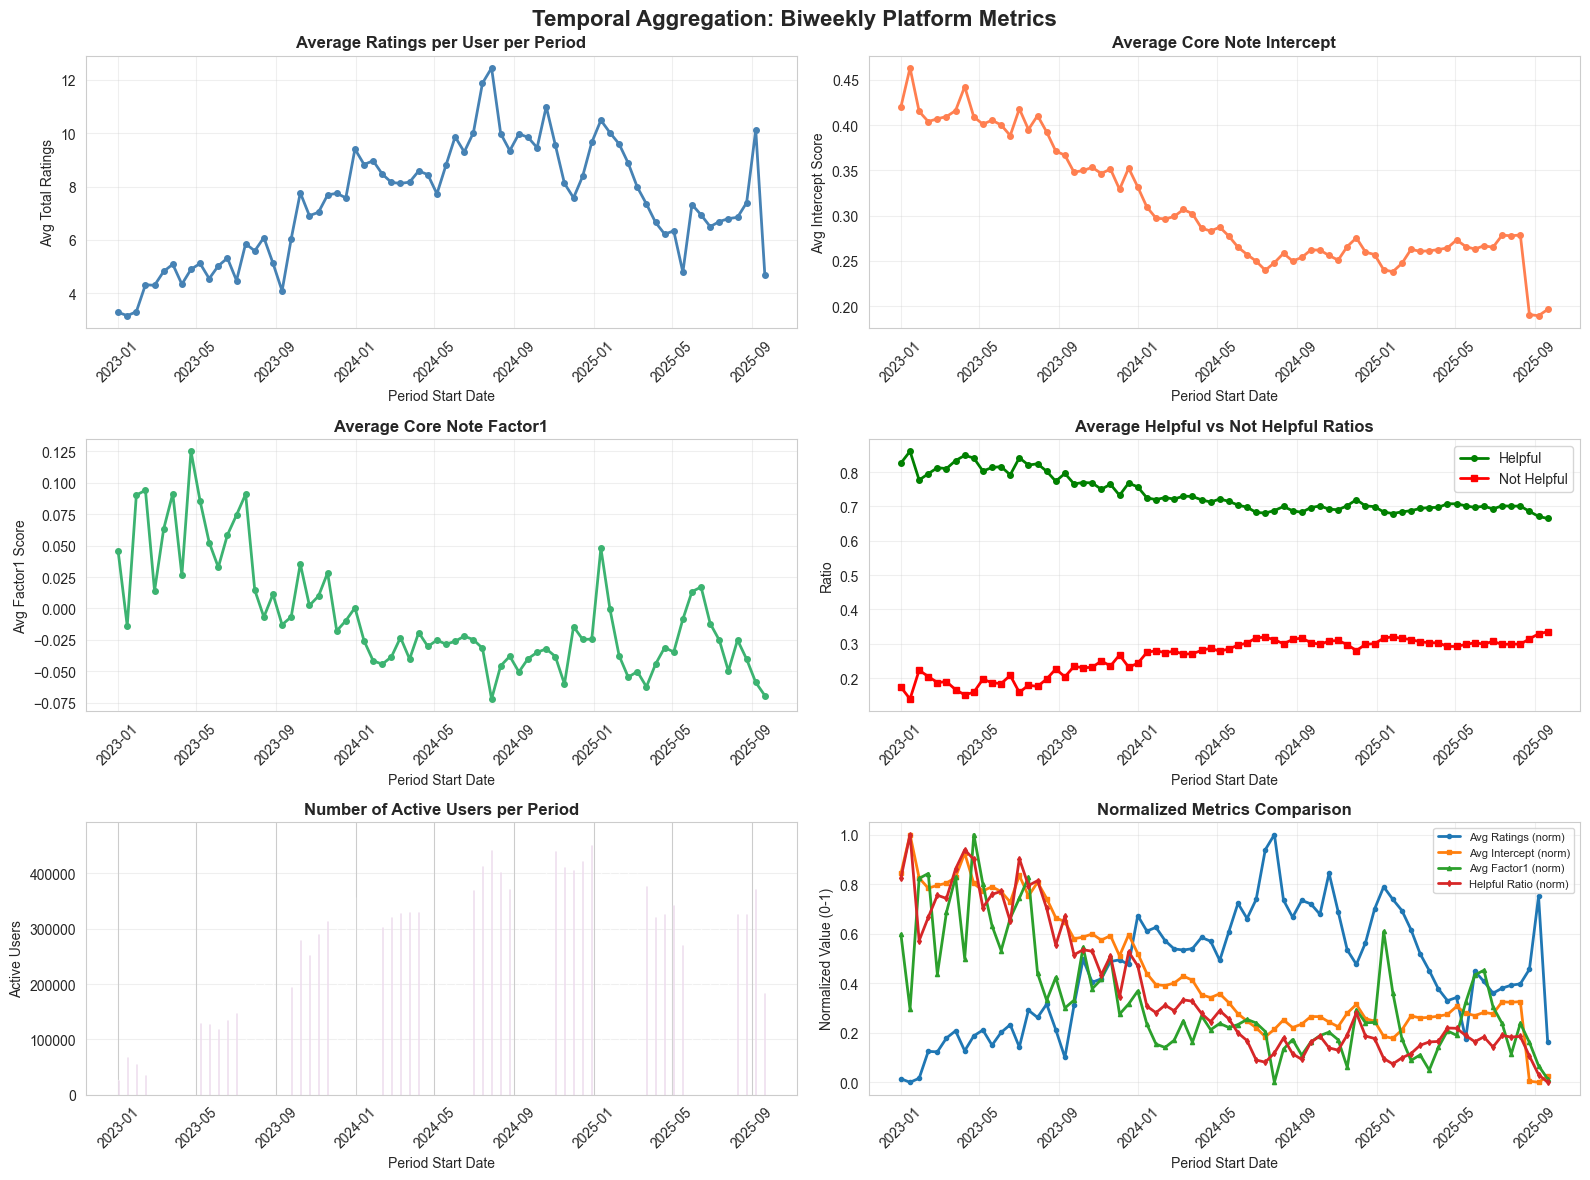


✅ Temporal aggregation complete!


In [49]:
import os, duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates"
output_path = os.path.join(base, "user_biweekly_aggregates.parquet")

print("📊 Aggregating data by period...\n")

con = duckdb.connect()

# Aggregate by period (average across all users in each period)
temporal_agg = con.execute(f"""
    SELECT 
        period_start,
        COUNT(*) as active_users,
        ROUND(AVG(total_ratings), 2) as avg_total_ratings,
        ROUND(AVG(avg_core_note_intercept), 4) as avg_intercept,
        ROUND(AVG(avg_core_note_factor1), 4) as avg_factor1,
        ROUND(AVG(helpful_ratio), 4) as avg_helpful_ratio,
        ROUND(AVG(not_helpful_ratio), 4) as avg_not_helpful_ratio
    FROM '{output_path}'
    GROUP BY period_start
    ORDER BY period_start
""").fetchdf()

con.close()

print(f"Periods analyzed: {len(temporal_agg)}\n")
print(temporal_agg.head(10))

# Create visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Temporal Aggregation: Biweekly Platform Metrics', fontsize=16, fontweight='bold')

# 1. Average Total Ratings per User
axes[0, 0].plot(temporal_agg['period_start'], temporal_agg['avg_total_ratings'], 
                marker='o', linewidth=2, markersize=4, color='steelblue')
axes[0, 0].set_title('Average Ratings per User per Period', fontweight='bold')
axes[0, 0].set_xlabel('Period Start Date')
axes[0, 0].set_ylabel('Avg Total Ratings')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Average Core Note Intercept
axes[0, 1].plot(temporal_agg['period_start'], temporal_agg['avg_intercept'], 
                marker='o', linewidth=2, markersize=4, color='coral')
axes[0, 1].set_title('Average Core Note Intercept', fontweight='bold')
axes[0, 1].set_xlabel('Period Start Date')
axes[0, 1].set_ylabel('Avg Intercept Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Average Core Note Factor1
axes[1, 0].plot(temporal_agg['period_start'], temporal_agg['avg_factor1'], 
                marker='o', linewidth=2, markersize=4, color='mediumseagreen')
axes[1, 0].set_title('Average Core Note Factor1', fontweight='bold')
axes[1, 0].set_xlabel('Period Start Date')
axes[1, 0].set_ylabel('Avg Factor1 Score')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Helpful vs Not Helpful Ratios
axes[1, 1].plot(temporal_agg['period_start'], temporal_agg['avg_helpful_ratio'], 
                marker='o', linewidth=2, markersize=4, color='green', label='Helpful')
axes[1, 1].plot(temporal_agg['period_start'], temporal_agg['avg_not_helpful_ratio'], 
                marker='s', linewidth=2, markersize=4, color='red', label='Not Helpful')
axes[1, 1].set_title('Average Helpful vs Not Helpful Ratios', fontweight='bold')
axes[1, 1].set_xlabel('Period Start Date')
axes[1, 1].set_ylabel('Ratio')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 5. Active Users per Period
axes[2, 0].bar(temporal_agg['period_start'], temporal_agg['active_users'], 
               color='purple', alpha=0.7)
axes[2, 0].set_title('Number of Active Users per Period', fontweight='bold')
axes[2, 0].set_xlabel('Period Start Date')
axes[2, 0].set_ylabel('Active Users')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(True, alpha=0.3, axis='y')

# 6. Combined normalized view
# Normalize metrics to 0-1 scale for comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
metrics_to_normalize = ['avg_total_ratings', 'avg_intercept', 'avg_factor1', 'avg_helpful_ratio']
normalized_data = temporal_agg[metrics_to_normalize].copy()
normalized_data = pd.DataFrame(
    scaler.fit_transform(normalized_data),
    columns=metrics_to_normalize,
    index=temporal_agg.index
)
normalized_data['period_start'] = temporal_agg['period_start'].values

axes[2, 1].plot(normalized_data['period_start'], normalized_data['avg_total_ratings'], 
                marker='o', linewidth=2, markersize=3, label='Avg Ratings (norm)')
axes[2, 1].plot(normalized_data['period_start'], normalized_data['avg_intercept'], 
                marker='s', linewidth=2, markersize=3, label='Avg Intercept (norm)')
axes[2, 1].plot(normalized_data['period_start'], normalized_data['avg_factor1'], 
                marker='^', linewidth=2, markersize=3, label='Avg Factor1 (norm)')
axes[2, 1].plot(normalized_data['period_start'], normalized_data['avg_helpful_ratio'], 
                marker='d', linewidth=2, markersize=3, label='Helpful Ratio (norm)')
axes[2, 1].set_title('Normalized Metrics Comparison', fontweight='bold')
axes[2, 1].set_xlabel('Period Start Date')
axes[2, 1].set_ylabel('Normalized Value (0-1)')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].legend(loc='best', fontsize=8)
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Temporal aggregation complete!")

In [50]:
import os, duckdb

# --- Paths ---
base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates"
input_path = os.path.join(base, "ratings_with_scores.parquet")
output_path = os.path.join(base, "user_biweekly_helpful_vs_not.parquet")

print("🚀 Creating detailed aggregation: helpful vs not helpful note characteristics...\n")

con = duckdb.connect()
con.execute("PRAGMA memory_limit='8GB';")

# Create aggregated dataset with separate stats for helpful vs not helpful
query = f"""
COPY (
    WITH dated_ratings AS (
        SELECT
            raterParticipantId,
            noteId,
            ratingStatus,
            to_timestamp(createdAtMillis / 1000) AS createdAt,
            coreNoteIntercept,
            coreNoteFactor1
        FROM '{input_path}'
        WHERE to_timestamp(createdAtMillis / 1000) >= '2023-01-01'::TIMESTAMP
    ),
    biweekly_periods AS (
        SELECT
            raterParticipantId,
            noteId,
            ratingStatus,
            createdAt,
            coreNoteIntercept,
            coreNoteFactor1,
            -- Create 2-week periods starting from 2023-01-01
            DATE '2023-01-01' + (FLOOR(EPOCH(createdAt - TIMESTAMP '2023-01-01') / (14 * 86400)) * 14) * INTERVAL '1 day' AS period_start
        FROM dated_ratings
    )
    SELECT
        raterParticipantId,
        period_start,
        period_start + INTERVAL '13 days' AS period_end,
        
        -- Overall counts
        COUNT(*) AS total_ratings,
        COUNT(DISTINCT noteId) AS unique_notes_rated,
        
        -- Helpful ratings stats
        SUM(CASE WHEN ratingStatus = 'HELPFUL' THEN 1 ELSE 0 END) AS helpful_count,
        ROUND(AVG(CASE WHEN ratingStatus = 'HELPFUL' THEN coreNoteIntercept END), 4) AS avg_intercept_helpful,
        ROUND(AVG(CASE WHEN ratingStatus = 'HELPFUL' THEN coreNoteFactor1 END), 4) AS avg_factor1_helpful,
        ROUND(STDDEV(CASE WHEN ratingStatus = 'HELPFUL' THEN coreNoteIntercept END), 4) AS stddev_intercept_helpful,
        ROUND(STDDEV(CASE WHEN ratingStatus = 'HELPFUL' THEN coreNoteFactor1 END), 4) AS stddev_factor1_helpful,
        COUNT(CASE WHEN ratingStatus = 'HELPFUL' AND coreNoteIntercept IS NOT NULL THEN 1 END) AS helpful_with_scores,
        
        -- Not helpful ratings stats
        SUM(CASE WHEN ratingStatus = 'NOT_HELPFUL' THEN 1 ELSE 0 END) AS not_helpful_count,
        ROUND(AVG(CASE WHEN ratingStatus = 'NOT_HELPFUL' THEN coreNoteIntercept END), 4) AS avg_intercept_not_helpful,
        ROUND(AVG(CASE WHEN ratingStatus = 'NOT_HELPFUL' THEN coreNoteFactor1 END), 4) AS avg_factor1_not_helpful,
        ROUND(STDDEV(CASE WHEN ratingStatus = 'NOT_HELPFUL' THEN coreNoteIntercept END), 4) AS stddev_intercept_not_helpful,
        ROUND(STDDEV(CASE WHEN ratingStatus = 'NOT_HELPFUL' THEN coreNoteFactor1 END), 4) AS stddev_factor1_not_helpful,
        COUNT(CASE WHEN ratingStatus = 'NOT_HELPFUL' AND coreNoteIntercept IS NOT NULL THEN 1 END) AS not_helpful_with_scores,
        
        -- Difference metrics (helpful - not_helpful)
        ROUND(
            AVG(CASE WHEN ratingStatus = 'HELPFUL' THEN coreNoteIntercept END) - 
            AVG(CASE WHEN ratingStatus = 'NOT_HELPFUL' THEN coreNoteIntercept END), 
            4
        ) AS intercept_diff_helpful_minus_not,
        ROUND(
            AVG(CASE WHEN ratingStatus = 'HELPFUL' THEN coreNoteFactor1 END) - 
            AVG(CASE WHEN ratingStatus = 'NOT_HELPFUL' THEN coreNoteFactor1 END), 
            4
        ) AS factor1_diff_helpful_minus_not,
        
        -- Unknown ratings
        SUM(CASE WHEN ratingStatus = 'UNKNOWN' THEN 1 ELSE 0 END) AS unknown_count
        
    FROM biweekly_periods
    GROUP BY raterParticipantId, period_start
    HAVING helpful_count > 0 OR not_helpful_count > 0  -- Only users who rated something
    ORDER BY raterParticipantId, period_start
) TO '{output_path}' (FORMAT PARQUET);
"""

print("Executing detailed aggregation query...")
con.execute(query)
con.close()

print(f"\n✅ Done! Detailed aggregates saved to:\n{output_path}")

# Preview results
print("\n📊 Preview of detailed aggregated data:")
con = duckdb.connect()
preview = con.execute(f"""
    SELECT 
        raterParticipantId,
        period_start,
        helpful_count,
        not_helpful_count,
        avg_intercept_helpful,
        avg_intercept_not_helpful,
        intercept_diff_helpful_minus_not,
        avg_factor1_helpful,
        avg_factor1_not_helpful,
        factor1_diff_helpful_minus_not
    FROM '{output_path}' 
    LIMIT 10
""").fetchdf()
print(preview)

row_count = con.execute(f"SELECT COUNT(*) FROM '{output_path}'").fetchone()[0]
print(f"\nTotal user-period combinations: {row_count:,}")
con.close()

🚀 Creating detailed aggregation: helpful vs not helpful note characteristics...

Executing detailed aggregation query...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


✅ Done! Detailed aggregates saved to:
C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates\user_biweekly_helpful_vs_not.parquet

📊 Preview of detailed aggregated data:
                                  raterParticipantId period_start  \
0  0000010BB832A9CFDF102BF7B66896FA987C80FBB61EF6...   2023-12-31   
1  0000010BB832A9CFDF102BF7B66896FA987C80FBB61EF6...   2024-02-25   
2  0000010BB832A9CFDF102BF7B66896FA987C80FBB61EF6...   2024-03-24   
3  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2023-11-05   
4  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2023-12-03   
5  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2024-01-28   
6  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2024-02-11   
7  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2024-02-25   
8  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2024-03-10   
9  000011269AD6F327AED0F4086A732B4052F9D28E8791E1...   2024-0

📊 Aggregating helpful vs not helpful characteristics by period...

Periods analyzed: 72

  period_start  active_users  avg_intercept_helpful  \
0   2023-01-01         26360                 0.4370   
1   2023-01-15         68288                 0.4766   
2   2023-01-29         54772                 0.4380   
3   2023-02-12         36118                 0.4278   
4   2023-02-26         57146                 0.4211   
5   2023-03-12         63518                 0.4248   
6   2023-03-26         84159                 0.4341   
7   2023-04-09         89173                 0.4578   
8   2023-04-23        127217                 0.4288   
9   2023-05-07        127587                 0.4223   

   avg_intercept_not_helpful  avg_factor1_helpful  avg_factor1_not_helpful  \
0                     0.2314               0.0437                   0.0402   
1                     0.2758              -0.0184                   0.0305   
2                     0.2606               0.0674                   0.1

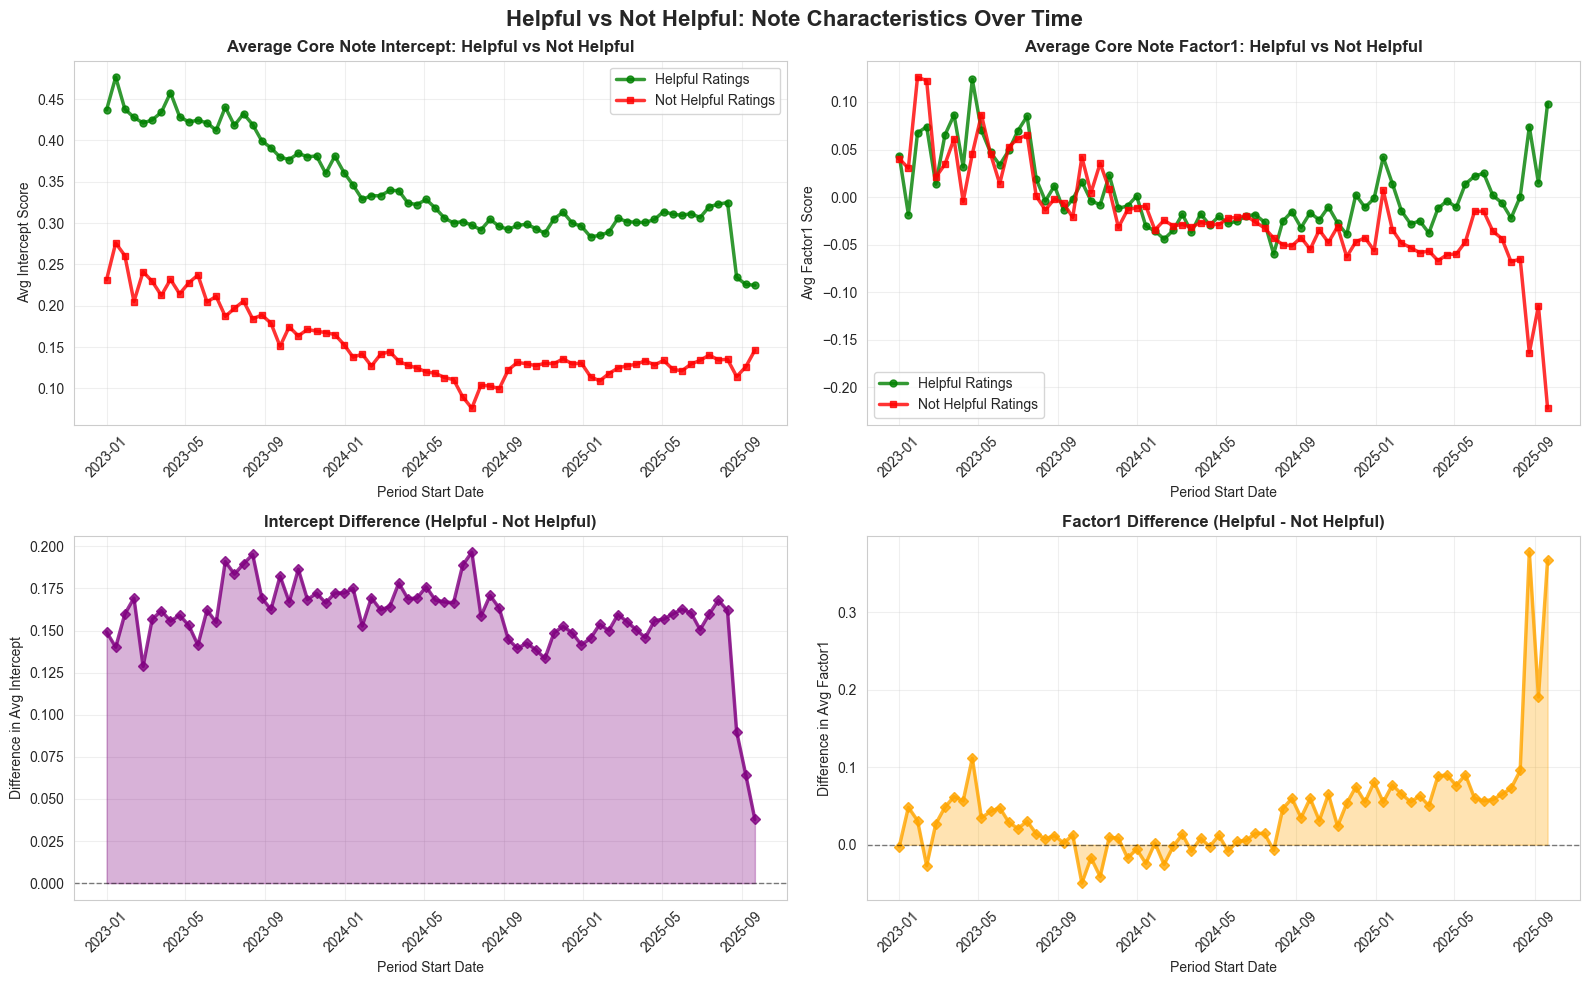


📈 Summary Statistics:
Average Intercept Difference (Helpful - Not Helpful): 0.1576
Average Factor1 Difference (Helpful - Not Helpful): 0.0436

Total Helpful Ratings: 101,503,144.0
Total Not Helpful Ratings: 59,978,302.0

✅ Visualization complete!


In [51]:
import os, duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates"
output_path = os.path.join(base, "user_biweekly_helpful_vs_not.parquet")

print("📊 Aggregating helpful vs not helpful characteristics by period...\n")

con = duckdb.connect()

# Aggregate by period - average across all users
temporal_helpful_vs_not = con.execute(f"""
    SELECT 
        period_start,
        COUNT(*) as active_users,
        ROUND(AVG(avg_intercept_helpful), 4) as avg_intercept_helpful,
        ROUND(AVG(avg_intercept_not_helpful), 4) as avg_intercept_not_helpful,
        ROUND(AVG(avg_factor1_helpful), 4) as avg_factor1_helpful,
        ROUND(AVG(avg_factor1_not_helpful), 4) as avg_factor1_not_helpful,
        ROUND(AVG(intercept_diff_helpful_minus_not), 4) as avg_intercept_diff,
        ROUND(AVG(factor1_diff_helpful_minus_not), 4) as avg_factor1_diff,
        SUM(helpful_count) as total_helpful,
        SUM(not_helpful_count) as total_not_helpful
    FROM '{output_path}'
    WHERE avg_intercept_helpful IS NOT NULL 
       OR avg_intercept_not_helpful IS NOT NULL
    GROUP BY period_start
    ORDER BY period_start
""").fetchdf()

con.close()

print(f"Periods analyzed: {len(temporal_helpful_vs_not)}\n")
print(temporal_helpful_vs_not.head(10))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Helpful vs Not Helpful: Note Characteristics Over Time', fontsize=16, fontweight='bold')

# 1. Core Note Intercept - Helpful vs Not Helpful
axes[0, 0].plot(temporal_helpful_vs_not['period_start'], 
                temporal_helpful_vs_not['avg_intercept_helpful'], 
                marker='o', linewidth=2.5, markersize=5, color='green', label='Helpful Ratings', alpha=0.8)
axes[0, 0].plot(temporal_helpful_vs_not['period_start'], 
                temporal_helpful_vs_not['avg_intercept_not_helpful'], 
                marker='s', linewidth=2.5, markersize=5, color='red', label='Not Helpful Ratings', alpha=0.8)
axes[0, 0].set_title('Average Core Note Intercept: Helpful vs Not Helpful', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Period Start Date', fontsize=10)
axes[0, 0].set_ylabel('Avg Intercept Score', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(loc='best')
axes[0, 0].grid(True, alpha=0.3)

# 2. Core Note Factor1 - Helpful vs Not Helpful
axes[0, 1].plot(temporal_helpful_vs_not['period_start'], 
                temporal_helpful_vs_not['avg_factor1_helpful'], 
                marker='o', linewidth=2.5, markersize=5, color='green', label='Helpful Ratings', alpha=0.8)
axes[0, 1].plot(temporal_helpful_vs_not['period_start'], 
                temporal_helpful_vs_not['avg_factor1_not_helpful'], 
                marker='s', linewidth=2.5, markersize=5, color='red', label='Not Helpful Ratings', alpha=0.8)
axes[0, 1].set_title('Average Core Note Factor1: Helpful vs Not Helpful', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Period Start Date', fontsize=10)
axes[0, 1].set_ylabel('Avg Factor1 Score', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(loc='best')
axes[0, 1].grid(True, alpha=0.3)

# 3. Difference in Intercept (Helpful - Not Helpful)
axes[1, 0].plot(temporal_helpful_vs_not['period_start'], 
                temporal_helpful_vs_not['avg_intercept_diff'], 
                marker='D', linewidth=2.5, markersize=5, color='purple', alpha=0.8)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 0].fill_between(temporal_helpful_vs_not['period_start'], 
                         temporal_helpful_vs_not['avg_intercept_diff'], 
                         0, alpha=0.3, color='purple')
axes[1, 0].set_title('Intercept Difference (Helpful - Not Helpful)', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Period Start Date', fontsize=10)
axes[1, 0].set_ylabel('Difference in Avg Intercept', fontsize=10)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Difference in Factor1 (Helpful - Not Helpful)
axes[1, 1].plot(temporal_helpful_vs_not['period_start'], 
                temporal_helpful_vs_not['avg_factor1_diff'], 
                marker='D', linewidth=2.5, markersize=5, color='orange', alpha=0.8)
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 1].fill_between(temporal_helpful_vs_not['period_start'], 
                         temporal_helpful_vs_not['avg_factor1_diff'], 
                         0, alpha=0.3, color='orange')
axes[1, 1].set_title('Factor1 Difference (Helpful - Not Helpful)', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Period Start Date', fontsize=10)
axes[1, 1].set_ylabel('Difference in Avg Factor1', fontsize=10)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📈 Summary Statistics:")
print(f"Average Intercept Difference (Helpful - Not Helpful): {temporal_helpful_vs_not['avg_intercept_diff'].mean():.4f}")
print(f"Average Factor1 Difference (Helpful - Not Helpful): {temporal_helpful_vs_not['avg_factor1_diff'].mean():.4f}")
print(f"\nTotal Helpful Ratings: {temporal_helpful_vs_not['total_helpful'].sum():,}")
print(f"Total Not Helpful Ratings: {temporal_helpful_vs_not['total_not_helpful'].sum():,}")

print("\n✅ Visualization complete!")

In [52]:
import os, duckdb

# --- Paths ---
base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data"
notes_path = os.path.join(base, "notes-00000.parquet")
scores_path = os.path.join(base, "scored_notes_2dim.parquet")

intermediates_dir = os.path.join(base, "intermediates")
os.makedirs(intermediates_dir, exist_ok=True)
output_path = os.path.join(intermediates_dir, "user_biweekly_written_notes.parquet")

print("🚀 Processing notes written by users: joining with scores and aggregating...\n")

con = duckdb.connect()
con.execute("PRAGMA memory_limit='8GB';")

# Create aggregated dataset for notes written by users
query = f"""
COPY (
    WITH notes_with_scores AS (
        SELECT
            n.noteId,
            n.noteAuthorParticipantId,
            n.createdAtMillis,
            s.coreNoteIntercept,
            s.coreNoteFactor1
        FROM read_parquet('{notes_path}') n
        LEFT JOIN read_parquet('{scores_path}') s ON n.noteId = s.noteId
        WHERE n.createdAtMillis IS NOT NULL
    ),
    dated_notes AS (
        SELECT
            noteId,
            noteAuthorParticipantId,
            to_timestamp(createdAtMillis / 1000) AS createdAt,
            coreNoteIntercept,
            coreNoteFactor1
        FROM notes_with_scores
        WHERE to_timestamp(createdAtMillis / 1000) >= '2023-01-01'::TIMESTAMP
    ),
    biweekly_periods AS (
        SELECT
            noteId,
            noteAuthorParticipantId,
            createdAt,
            coreNoteIntercept,
            coreNoteFactor1,
            -- Create 2-week periods starting from 2023-01-01
            DATE '2023-01-01' + (FLOOR(EPOCH(createdAt - TIMESTAMP '2023-01-01') / (14 * 86400)) * 14) * INTERVAL '1 day' AS period_start
        FROM dated_notes
    )
    SELECT
        noteAuthorParticipantId,
        period_start,
        period_start + INTERVAL '13 days' AS period_end,
        
        -- Count metrics
        COUNT(*) AS total_notes_written,
        COUNT(DISTINCT noteId) AS unique_notes_written,
        
        -- Notes with scores
        COUNT(coreNoteIntercept) AS notes_with_intercept,
        COUNT(coreNoteFactor1) AS notes_with_factor1,
        
        -- Average scores for notes written
        ROUND(AVG(coreNoteIntercept), 4) AS avg_intercept_written,
        ROUND(MIN(coreNoteIntercept), 4) AS min_intercept_written,
        ROUND(MAX(coreNoteIntercept), 4) AS max_intercept_written,
        ROUND(STDDEV(coreNoteIntercept), 4) AS stddev_intercept_written,
        
        ROUND(AVG(coreNoteFactor1), 4) AS avg_factor1_written,
        ROUND(MIN(coreNoteFactor1), 4) AS min_factor1_written,
        ROUND(MAX(coreNoteFactor1), 4) AS max_factor1_written,
        ROUND(STDDEV(coreNoteFactor1), 4) AS stddev_factor1_written
        
    FROM biweekly_periods
    GROUP BY noteAuthorParticipantId, period_start
    ORDER BY noteAuthorParticipantId, period_start
) TO '{output_path}' (FORMAT PARQUET);
"""

print("Executing aggregation query for written notes...")
con.execute(query)
con.close()

print(f"\n✅ Done! User biweekly written notes aggregates saved to:\n{output_path}")

# Preview results
print("\n📊 Preview of written notes aggregated data:")
con = duckdb.connect()
preview = con.execute(f"""
    SELECT 
        noteAuthorParticipantId,
        period_start,
        total_notes_written,
        notes_with_intercept,
        avg_intercept_written,
        avg_factor1_written
    FROM '{output_path}' 
    ORDER BY period_start
    LIMIT 10
""").fetchdf()
print(preview)

row_count = con.execute(f"SELECT COUNT(*) FROM '{output_path}'").fetchone()[0]
print(f"\nTotal author-period combinations: {row_count:,}")

# Get summary stats
summary = con.execute(f"""
    SELECT 
        COUNT(DISTINCT noteAuthorParticipantId) as unique_authors,
        SUM(total_notes_written) as total_notes,
        ROUND(AVG(avg_intercept_written), 4) as overall_avg_intercept,
        ROUND(AVG(avg_factor1_written), 4) as overall_avg_factor1
    FROM '{output_path}'
""").fetchdf()
print("\n📈 Overall Summary:")
print(summary)

con.close()

🚀 Processing notes written by users: joining with scores and aggregating...

Executing aggregation query for written notes...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


✅ Done! User biweekly written notes aggregates saved to:
C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data\intermediates\user_biweekly_written_notes.parquet

📊 Preview of written notes aggregated data:
                             noteAuthorParticipantId period_start  \
0  1EAD004DADA9EC622508E680A3C76349EE9E3971F66AC2...   2023-01-01   
1  1ECA335DA7F91AC90D86E02827CC83D24AD512AC3DC222...   2023-01-01   
2  1FC5EFC0DA07C578EE5644093E391671F834F947813F80...   2023-01-01   
3  20558A8E59165A29BB77DCFD1B1E16B18D9AB26ADCDCAE...   2023-01-01   
4  2273018E2BAC8839F4CFEF4A78CAAE3596CB434862A06F...   2023-01-01   
5  22D6B58B4848D75AF58021F03E4FE687F92AAE6CCE7790...   2023-01-01   
6  234B3D9D9B41A8FC582FC1ECA1489806A9CEB46ABCCE1F...   2023-01-01   
7  2559F2F192100C416A1B7B1B5AE2327C8A88B76BB3969E...   2023-01-01   
8  2596E24FBDE908EC87FB8EBD6DB38506FD8A5895E6BAB9...   2023-01-01   
9  25A63706FE3A58FC33C5F372D70F00BF17E

In [ ]:
import os, duckdb

# --- Paths ---
base = r"C:\Users\wongb\twitter-community-notes-time-series\twitter-community-notes-user-time-series\user_data_aggregating\data"
master_path = os.path.join(base, "user_period_master.parquet")
helpful_vs_not_path = os.path.join(base, "intermediates", "user_biweekly_helpful_vs_not.parquet")
output_path = os.path.join(base, "user_period_master_enriched.parquet")

print("🚀 Enriching user_period_master with helpful vs not helpful analysis...\n")

con = duckdb.connect()
con.execute("PRAGMA memory_limit='8GB';")

# Join and enrich the master dataset
query = f"""
COPY (
    SELECT 
        m.*,
        -- Add helpful vs not helpful columns
        h.helpful_count,
        h.not_helpful_count,
        h.avg_intercept_helpful,
        h.avg_intercept_not_helpful,
        h.intercept_diff_helpful_minus_not,
        h.avg_factor1_helpful,
        h.avg_factor1_not_helpful,
        h.factor1_diff_helpful_minus_not
    FROM read_parquet('{master_path}') m
    LEFT JOIN read_parquet('{helpful_vs_not_path}') h 
        ON m.userId = h.raterParticipantId 
        AND m.period_start = h.period_start
    ORDER BY m.userId, m.period_start
) TO '{output_path}' (FORMAT PARQUET);
"""

print("Executing join and enrichment query...")
con.execute(query)

print(f"\n✅ Done! Enriched master dataset saved to:\n{output_path}")

# Verify the join
print("\n📊 Verification:")
stats = con.execute(f"""
    SELECT 
        COUNT(*) as total_rows,
        COUNT(helpful_count) as rows_with_helpful_data,
        ROUND(COUNT(helpful_count) * 100.0 / COUNT(*), 2) as pct_with_helpful_data,
        COUNT(DISTINCT userId) as unique_users
    FROM '{output_path}'
""").fetchdf()
print(stats.to_string(index=False))

# Preview the enriched data
print("\n📝 Preview of enriched dataset:")
preview = con.execute(f"""
    SELECT 
        userId,
        period_start,
        helpful_count,
        not_helpful_count,
        avg_intercept_helpful,
        avg_intercept_not_helpful,
        intercept_diff_helpful_minus_not,
        avg_factor1_helpful,
        avg_factor1_not_helpful,
        factor1_diff_helpful_minus_not
    FROM '{output_path}'
    WHERE helpful_count IS NOT NULL
    LIMIT 10
""").fetchdf()
print(preview.to_string(index=False))

con.close()

print("\n✅ Enrichment complete!")